# Emotion Recognition of Facial Expression


In [ ]:
from __future__ import print_function
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time

In [2]:
# getting the data
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y
X, Y = getData(filname)
num_class = len(set(Y))

In [3]:
# To see number of training data point available for each label
def balance_class(Y):
    num_class = set(Y)
    count_class = {}
    for i in range(len(num_class)):
        count_class[i] = sum([1 for y in Y if y == i])
    return count_class
balance = balance_class(Y)

In [4]:
print(balance)

{0: 4953, 1: 547, 2: 5121, 3: 8989, 4: 6077, 5: 4002, 6: 6198}


In [5]:
for_plot = 'For_plot.csv'
X_for_plot, Y_for_plot = getData(for_plot)

Expression: Happy


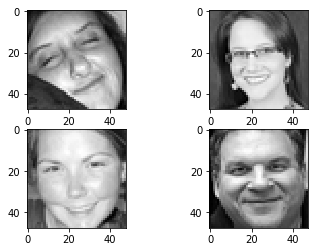

Expression: Sad


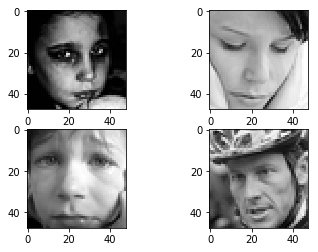

Expression: Surprise


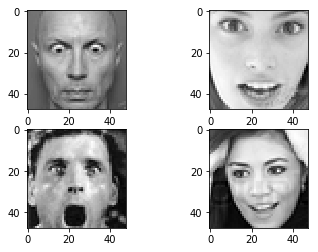

Expression: Anger


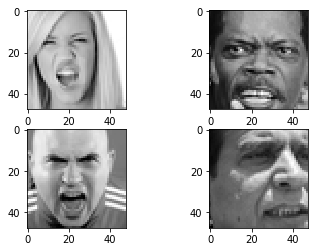

Expression: Fear


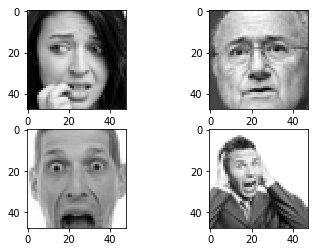

Expression: Disgust


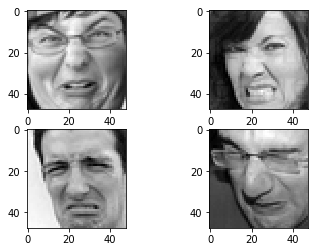

Expression: Neutral


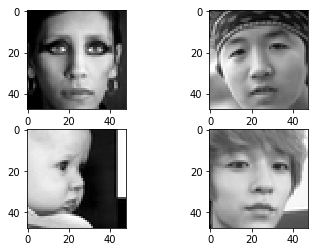

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print('\033[4m' + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[15]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,1].imshow(np.reshape(X_for_plot[15], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[16], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[17], [48,48]),cmap='gray')
axarr[0,0].imshow(np.reshape(X_for_plot[18], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[20]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.reshape(X_for_plot[23], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[21], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[22], [48,48]),cmap='gray')
axarr[0,1].imshow(np.reshape(X_for_plot[24], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[25]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.reshape(X_for_plot[25], [48,48]),cmap='gray')
axarr[0,1].imshow(np.reshape(X_for_plot[26], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[27], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[28], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[0]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.reshape(X_for_plot[0], [48,48]),cmap='gray')
axarr[0,1].imshow(np.reshape(X_for_plot[1], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[2], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[3], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[10]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,1].imshow(np.reshape(X_for_plot[11], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[12], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[13], [48,48]),cmap='gray')
axarr[0,0].imshow(np.reshape(X_for_plot[14], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[5]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.reshape(X_for_plot[5], [48,48]),cmap='gray')
axarr[0,1].imshow(np.reshape(X_for_plot[6], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[7], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[8], [48,48]),cmap='gray')
plt.show()

print(color.UNDERLINE + color.BOLD + color.GREEN +'Expression: ' +label_map[Y_for_plot[30]]+ color.END)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.reshape(X_for_plot[30], [48,48]),cmap='gray')
axarr[0,1].imshow(np.reshape(X_for_plot[31], [48,48]),cmap='gray')
axarr[1,0].imshow(np.reshape(X_for_plot[32], [48,48]),cmap='gray')
axarr[1,1].imshow(np.reshape(X_for_plot[33], [48,48]),cmap='gray')
plt.show()

In [7]:
#Reshaping input data
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

# Split in  training set : validation set :  testing set in 80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [111]:
batch_size = 128
epochs = 15

#Shallow CNN model with two Convolution layer & one fully connected layer
def baseline_model():
    # Initialising the CNN
    model = Sequential()

    # 1 - Convolution
    model.add(Conv2D(64,(3,3), border_mode='same', input_shape=(48, 48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 2nd Convolution layer
    model.add(Conv2D(128,(5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    # Flattening
    model.add(Flatten())

    # Fully connected layer 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_class, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])
    return model


def baseline_model_saved():
    #load json and create model
    json_file = open('model_2layer_2_2_pool.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    #load weights from h5 file
    model.load_weights("model_2layer_2_2_pool.h5")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])
    return model

is_model_saved = False

# If model is not saved train the CNN model otherwise just load the weights
if(is_model_saved==False ):
    # Train model
    since = time.time()
    model = baseline_model()
    # Note : 3259 samples is used as validation data &   28,709  as training samples

    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_split=0.1111)
    model_json = model.to_json()
    with open("model_2layer_2_2_pool_final.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model_2layer_2_2_pool_final.h5")
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print("Saved model to disk")
else:
    # Load the trained model
    print("Load model from disk")
    model = baseline_model_saved()


# Model will predict the probability values for 7 labels for a test image
score = model.predict(X_test)
print (model.summary())

new_X = [ np.argmax(item) for item in score ]
y_test2 = [ np.argmax(item) for item in y_test]

# Calculating categorical accuracy taking label having highest probability
accuracy = [ (x==y) for x,y in zip(new_X,y_test2) ]
print(" Accuracy on Test set : " , np.mean(accuracy))

/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`


Train on 28709 samples, validate on 3589 samples
Epoch 1/15
 - 216s - loss: 0.3748 - categorical_accuracy: 0.3686 - val_loss: 0.3690 - val_categorical_accuracy: 0.3447
Epoch 2/15
 - 216s - loss: 0.3068 - categorical_accuracy: 0.4885 - val_loss: 0.3120 - val_categorical_accuracy: 0.4667
Epoch 3/15
 - 217s - loss: 0.2779 - categorical_accuracy: 0.5454 - val_loss: 0.3048 - val_categorical_accuracy: 0.4996
Epoch 4/15
 - 216s - loss: 0.2577 - categorical_accuracy: 0.5914 - val_loss: 0.2852 - val_categorical_accuracy: 0.5358
Epoch 5/15
 - 216s - loss: 0.2415 - categorical_accuracy: 0.6243 - val_loss: 0.3336 - val_categorical_accuracy: 0.4684
Epoch 6/15
 - 216s - loss: 0.2233 - categorical_accuracy: 0.6634 - val_loss: 0.2802 - val_categorical_accuracy: 0.5495
Epoch 7/15
 - 216s - loss: 0.2072 - categorical_accuracy: 0.6950 - val_loss: 0.2917 - val_categorical_accuracy: 0.5322
Epoch 8/15
 - 216s - loss: 0.1908 - categorical_accuracy: 0.7285 - val_loss: 0.3208 - val_categorical_accuracy: 0.4968

In [110]:
#Increasing epochs from 15 to 30 for Deep model
batch_size = 128
epochs = 30

#Deep CNN model with four Convolution layer & two fully connected layer
def baseline_model():
    # Initialising the CNN
    model = Sequential()

    # 1 - Convolution
    model.add(Conv2D(64,(3,3), border_mode='same', input_shape=(48, 48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 2nd Convolution layer
    model.add(Conv2D(128,(5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 3rd Convolution layer
    model.add(Conv2D(512,(3,3), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 4th Convolution layer
    model.add(Conv2D(512,(3,3), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    # Flattening
    model.add(Flatten())

    # Fully connected layer 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_class, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])
    return model


def baseline_model_saved():
    #load json and create model
    json_file = open('model_4layer_2_2_pool_final.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    #load weights from h5 file
    model.load_weights("model_4layer_2_2_pool_final.h5")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])
    return model

is_model_saved = False

# If model is not saved train the CNN model otherwise just load the weights
if(is_model_saved==False ):
    # Train model
    since = time.time()
    model = baseline_model()
    # Note : 3259 samples is used as validation data &   28,709  as training samples

    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_split=0.1111)
    model_json = model.to_json()
    with open("model_4layer_2_2_pool_final.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model_4layer_2_2_pool_final.h5")
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print("Saved model to disk")
else:
    # Load the trained model
    print("Load model from disk")
    model = baseline_model_saved()


# Model will predict the probability values for 7 labels for a test image
score = model.predict(X_test)
print (model.summary())

new_X = [ np.argmax(item) for item in score ]
y_test2 = [ np.argmax(item) for item in y_test]

# Calculating categorical accuracy taking label having highest probability
accuracy = [ (x==y) for x,y in zip(new_X,y_test2) ]
print(" Accuracy on Test set : " , np.mean(accuracy))


/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., padding="same")`
/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
/home/team3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`


Train on 28709 samples, validate on 3589 samples
Epoch 1/30
 - 395s - loss: 0.3916 - categorical_accuracy: 0.3073 - val_loss: 0.3992 - val_categorical_accuracy: 0.2772
Epoch 2/30
 - 394s - loss: 0.3193 - categorical_accuracy: 0.4513 - val_loss: 0.3491 - val_categorical_accuracy: 0.4191
Epoch 3/30
 - 395s - loss: 0.2889 - categorical_accuracy: 0.5131 - val_loss: 0.2816 - val_categorical_accuracy: 0.5244
Epoch 4/30
 - 394s - loss: 0.2700 - categorical_accuracy: 0.5554 - val_loss: 0.2914 - val_categorical_accuracy: 0.5079
Epoch 5/30
 - 396s - loss: 0.2584 - categorical_accuracy: 0.5775 - val_loss: 0.2957 - val_categorical_accuracy: 0.5004
Epoch 6/30
 - 393s - loss: 0.2471 - categorical_accuracy: 0.5984 - val_loss: 0.2594 - val_categorical_accuracy: 0.5723
Epoch 7/30
 - 394s - loss: 0.2382 - categorical_accuracy: 0.6150 - val_loss: 0.2586 - val_categorical_accuracy: 0.5868
Epoch 8/30
 - 393s - loss: 0.2305 - categorical_accuracy: 0.6346 - val_loss: 0.2436 - val_categorical_accuracy: 0.6055